<a href="https://colab.research.google.com/github/kebabee/Modelowanie-komputerowe/blob/main/Eden_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eden's Model
Eden's Model is simple structure growth model. Simulation starts with one live cell on a grid and the model evolves with given rules:
* Randomly pick one living cell
* Randomly pick one of free posiorions around this cell (up, down, left, right)
* Add new living cell in this point

When the nieghbourhood of the cell is full the cell dies and new growth around it is impossible.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def eden_step():
    curr_cell = alive_cells[np.random.randint(len(alive_cells))] # pick living cell
    curr_x = curr_cell[0]
    curr_y = curr_cell[1]
    new_positions = [[curr_x+1, curr_y],[curr_x-1, curr_y],[curr_x, curr_y+1],[curr_x, curr_y-1]] # posiible positions for new cell

    for _ in range(100):
        temp = new_positions[np.random.randint(0,4)]
        if arr[temp[0]][temp[1]] == 0: # if position is free
            alive_cells.append(temp)   # new cell appears
            arr[temp[0]][temp[1]] = 1
            break

    for ac in alive_cells: # check if any of living cells should die
        if arr[ac[0]-1][ac[1]] != 0 and arr[ac[0]+1][ac[1]] != 0 and arr[ac[0]][ac[1]+1] != 0 and arr[ac[0]-1][ac[1]-1] != 0:
            alive_cells.remove(ac)
            graveyard.append(ac)
            arr[ac[0]][ac[1]] = -1

Samples from simulation:

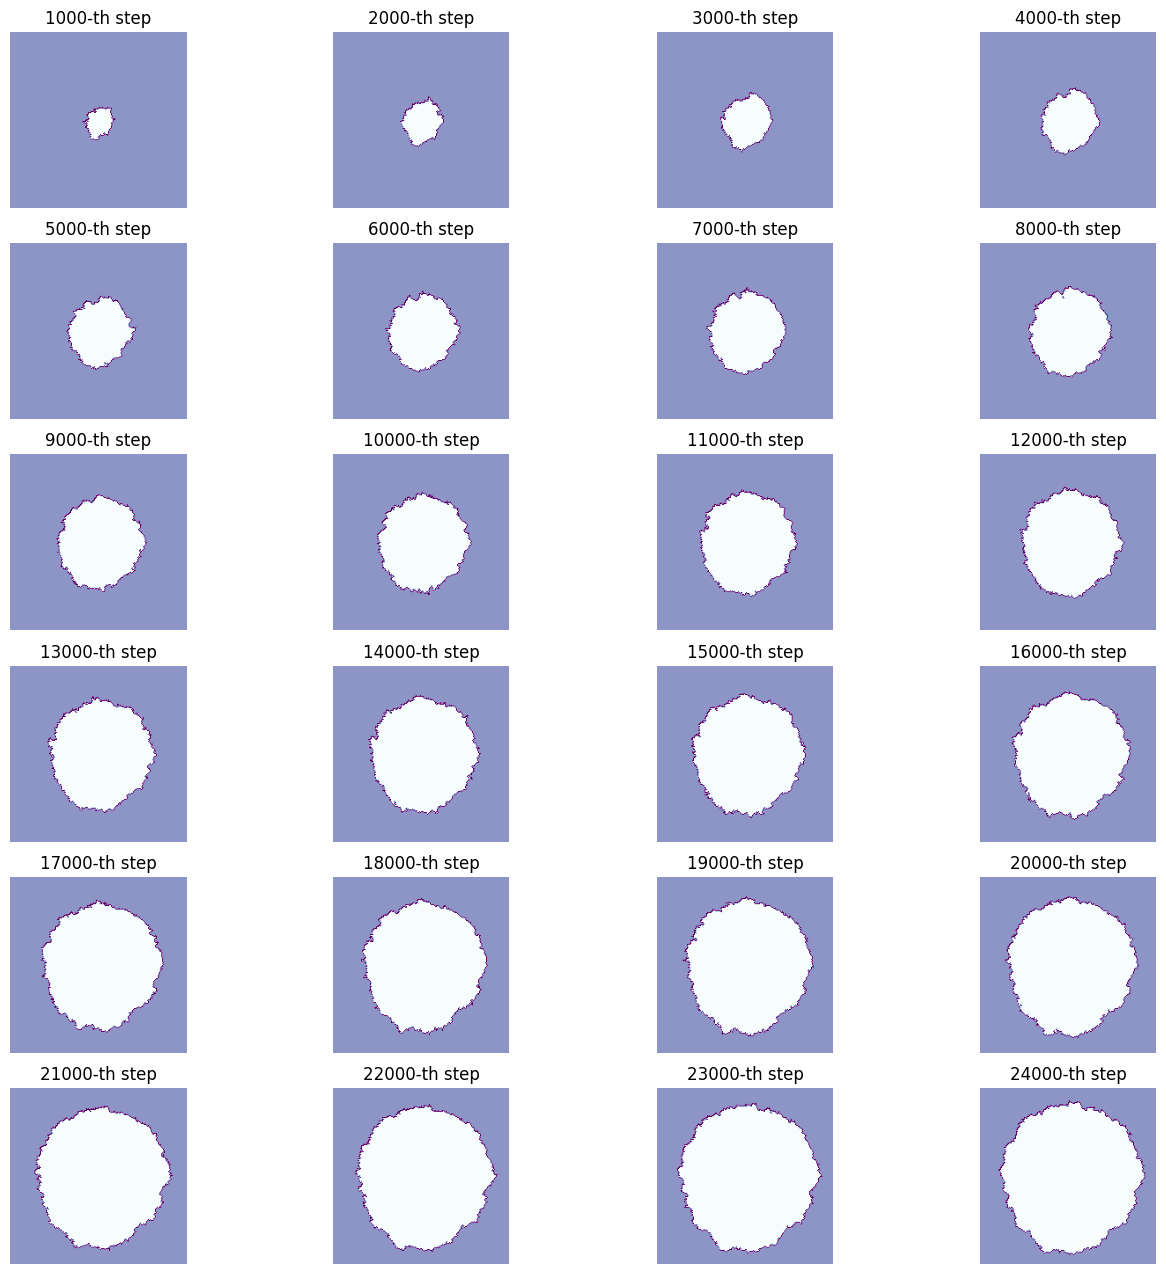

In [24]:
arr = np.zeros((200,200)) # state of the model
alive_cells = [[100,100]] # array for living cells, first cell is given
arr[100][100] = 1
graveyard = [] # array for dead cells

fig, axes = plt.subplots(6, 4, figsize=(16, 16))
for i in range(24):
    for _ in range(1000):
        eden_step()
    col, row = i % 4, i // 4
    axes[row, col].imshow(arr, cmap="BuPu")
    axes[row, col].set_title(f"{(i+1)*1000}-th step")
    axes[row, col].axis('off')
plt.show()

Living cells are the purple ones and dead are white.

### 1.1 Radius and living cells

I define the radius of a cluster as a distance from the starting point to the farest living cell.
$$R = \sqrt{(x_0 - x_{cell})^2 + (y_0 - y_{cell})^2}$$

The goal is to examine how the radius corresond to number of cells in clusetre, precisely $N^{1/d}$, where *d* is dimension (here $d=2$). I will analyze growth of 10k cells in 10 model iterations.

In [25]:
def cluster_R(center):
    max_R = 0

    for ac in alive_cells:
        R = np.sqrt((center - ac[0]) ** 2 + (center - ac[1]) ** 2)

        if R > max_R:
            max_R = R

    return max_R

size = 1000
Rs = []

for i in range(10):
    arr = np.zeros((size,size))
    alive_cells = [[size//2,size//2]]
    arr[size//2][size//2] = 1
    graveyard = []
    tempR = []
    tempN = []
    for _ in range(10000):
        eden_step()
        tempR.append(cluster_R(size//2))
        tempN.append(np.sqrt(len(alive_cells) + len(graveyard)))
    Rs.append(tempR)

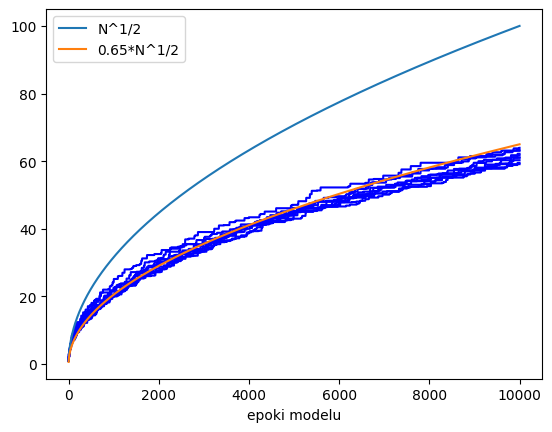

In [26]:
Rs_scaled = []
N_sqrt = [np.sqrt(a) for a in np.linspace(1, len(Rs[0]), len(Rs[0]))]
N_sqrt_scaled = [0.65*a for a in N_sqrt]

for R in Rs:
    plt.plot(np.linspace(1,len(R),len(R)), R, color='blue')
plt.plot(np.linspace(1,len(N_sqrt),len(N_sqrt)), N_sqrt, label='N^1/2')
plt.plot(np.linspace(1,len(N_sqrt),len(N_sqrt)), N_sqrt_scaled, label='0.65*N^1/2')
plt.xlabel('epoki modelu')
plt.legend()
plt.show()

With proper scaling $N^{1/2}$ is similar to the radius change, so: $$N^{1/d} \sim R$$